# Kmeans++ Algorithm(Iris data) by Xunyu Shen

# Import library and data preprocessing

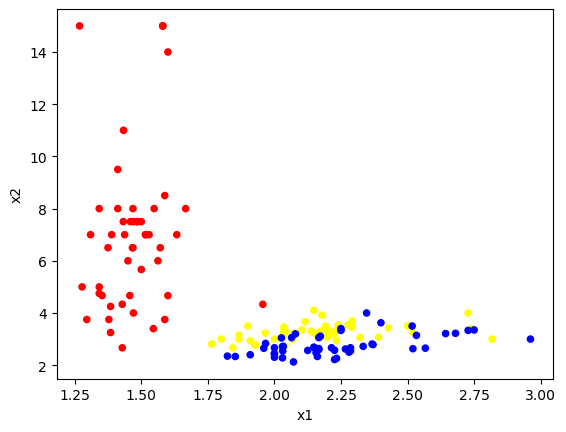

<Figure size 640x480 with 0 Axes>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

##
data = pd.read_csv('iris.data').dropna()

headerList=['sepal_length','sepal_width','petal_length','petal_width','label']
data.to_csv('data.csv', header=headerList,index=False)
iris=pd.read_csv('data.csv')

cluster=pd.DataFrame()
cluster['x1'] = iris['sepal_length']/iris['sepal_width']
cluster['x2'] = iris['petal_length']/iris['petal_width']
cluster['y']=iris['label']
y=cluster['y'].to_numpy()

for i in range(len(cluster)):
    if y[i]=='Iris-setosa':
        y[i]='red'
    elif y[i]=='Iris-versicolor':
        y[i]='yellow'
    elif y[i]=='Iris-virginica':
        y[i]='blue'

cluster.plot.scatter(x='x1',y='x2',c=y, title)
plt.show()
plt.clf()

In [24]:
#convert dataframe to numpy array
init_X=cluster. drop(columns=['y'])
X=init_X.to_numpy()

# Compute L2 norm distance

In [25]:
def distance(p1,p2,q1,q2):
    dist=(p1 - q1) ** 2 + (p2 - q2) ** 2
    return dist

# Initialization of centroids

In [ ]:
def k_init(X, k):
    centroid=np.empty((0,2),dtype=float)
    centroid=np.vstack((centroid,X[np.random.randint(0,len(X)-1),:]))
    dj=[]
    for j in range(len(X)):
        d =[]
        for i in range(centroid.shape[0]):
            d.append(distance(X[j][0],X[j][1],centroid[i][0],centroid[i][1]))
        dj.append(min(d))

    sum_d=np.sum(dj)
    dist_prob=[]
    p=[]
    for j in range(len(X)):
        dist_prob.append([dj[j]/sum_d,j])
        p.append(dj[j]/sum_d)

    for j in range(k-1):
        i=dj.index(np.random.choice(dj, size=1, p=p))
        centroid=np.vstack((centroid,X[i]))

    return centroid

# Update centroids

In [26]:
def k_means_pp(X, k, max_iter):
    initialized_centers=k_init(X, k)
    cluster_assign = np.zeros(len(X))
    updated_centroids = initialized_centers
    for i in range(0, max_iter):
        # Assign data points for each iteration
        data_map = assign_data2clusters(X, updated_centroids)
        for x in range(len(X)):
            for y in range(k):
                if data_map[y][x] == 1:
                    cluster_assign[x] = y+1


        for a in range(k):
            updated_centroids[a] = np.mean([X[j] for j in range(len(X)) if cluster_assign[j] == a+1], axis=0)
        # Compute objective for each iteration

    #print(data_map)
    print(updated_centroids)
    return updated_centroids
    pass

# Assign points to cluaters

In [27]:
def assign_data2clusters(X, C):
    #create a k*len(X) matrix for data_map
    data_map=np.zeros((len(C),len(X)))

    #map the data points into each cluster
    for j in range(len(X)):
        d=[]
        for i in range(len(C)):
            d.append(distance(X[j][0],X[j][1],C[i][0],C[i][1]))
        index=np.argmin(d)
        data_map[index][j]=1

    return data_map
    pas

# Plot and find best K

[[1.95848672 4.3494964 ]]
[[ 1.98140279  3.89841524]
 [ 1.49361803 13.5       ]]
[[ 1.4813013   7.24691358]
 [ 1.50726025 14.16666667]
 [ 2.09289505  3.1673129 ]]
[[ 2.09289505  3.1673129 ]
 [ 1.47958816  7.38095238]
 [ 1.58548387 14.75      ]
 [ 1.26829268 15.        ]]
[[       nan        nan]
 [1.95848672 4.3494964 ]
 [       nan        nan]
 [       nan        nan]
 [       nan        nan]]


C:\Users\30683\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\30683\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


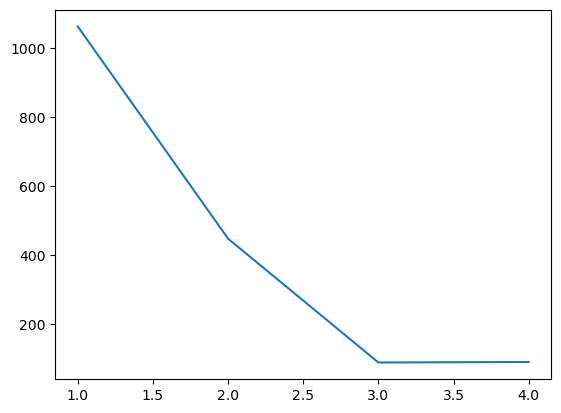

<Figure size 640x480 with 0 Axes>

In [28]:
def compute_objective(X, C):
    accuracy=0
    for j in range(len(X)):
        d = []
        for i in range(len(C)):
            d.append(distance(X[j][0], X[j][1], C[i][0], C[i][1]))
        accuracy += min(d)

    return accuracy
    pass

centroids = []
objectives = []

for k in range(1,6):
    centroids.append(k_means_pp(X, k, 50))

#print(centroids)
for k in range(0, 5):
    objectives.append(compute_objective(X, centroids[k]))

#print(objectives)

k=[1,2,3,4,5]
plt.plot(k,objectives)
plt.show()
plt.clf()

# Plot lost through 50 iterationns when K=3 

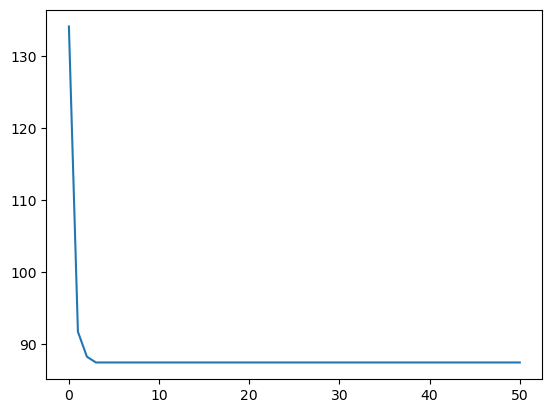

<Figure size 640x480 with 0 Axes>

In [29]:
#plot when k=3, 50 iterations
initialized_centers = k_init(X, 3)

# Call assign_data2clusters()
data_map = assign_data2clusters(X, initialized_centers)
clusters = np.zeros(len(X))
updated_centroids = initialized_centers

objective = [compute_objective(X, updated_centroids)]
# Calculate initial objective

for i in range(0, 50):
    # Assign data points for each iteration
    data_map = assign_data2clusters(X, updated_centroids)

    for x in range(len(X)):
        for t in range(3):
            if data_map[t][x] == 1:
                clusters[x] = t+1
    for a in range(3):
        updated_centroids[a] = np.mean(
            [X[j] for j in range(len(X)) if clusters[j] == a+1], axis=0)
        # Compute objective for each iteration
    objective.append(compute_objective(X, updated_centroids))
plt.plot(objective)
plt.show()
plt.clf()

# Plot final outcome of unsupervised clustering

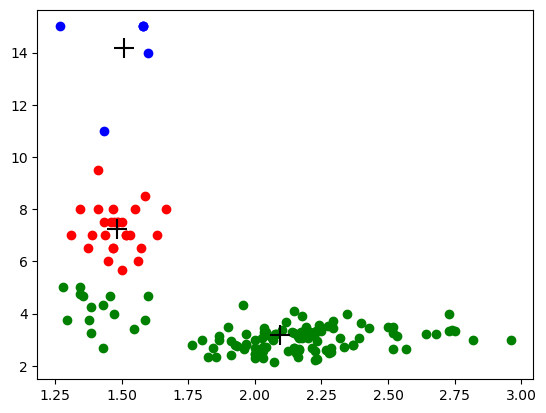

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot of data points in clusters and their centers for k=3.
data_map_3 = assign_data2clusters(X, centroids[2])

clusters_3 = np.zeros(len(X))
for x in range(len(X)):
    for y in range(len(centroids[2])):
        if data_map_3[y][x] == 1:
            clusters_3[x] = y


points = [X[j] for j in range(len(X)) if clusters_3[j] == 0]
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c='r')


points = [X[j] for j in range(len(X)) if clusters_3[j] == 1]
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c='b')

points = [X[j] for j in range(len(X)) if clusters_3[j] == 2]
points = np.array(points)
plt.scatter(points[:, 0], points[:, 1], c='g')

centroids3 = np.array(centroids[2])
plt.scatter(centroids3[:, 0], centroids3
            [:, 1], s=200, c='black', marker='+')

plt.show()
plt.clf()